## Explore time requirements for simulating the different systems

It is taking a long time to model the different breakthrough curves, especially for the diffusion-dominated systems. The required sampling size necessitates finding a faster way to accomplish the simulations.

In [4]:
import numpy as np
import pandas as pd
from scipy import special
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import model
from mpmath import invertlaplace
from mpmath import mp, exp
import random
import time
from SALib.sample import saltelli
from SALib.analyze import sobol

In [14]:
# create example parameters for the four different systems
# each system needs to have the same number of samples
# this requires it to be distinctly within the bounds of Pe or Da

# diffusive controlled transport
problem = {
    'num_vars': 8,
    'names': ['theta', 'rho_b','D','v','lamb','alpha','kd','Co'],
    'bounds': [[0, 1], # theta
               [1, 2], # rho_b
               [0.1, 2], # D
               [0.001, 0.05], # v
               [0, 0.0005], # lamb
               [0, 0.0005], # alpha
               [0, 0.0005], # kd
               [0,10]] # Co
}
param_values = saltelli.sample(problem, 2**8)
params_df = pd.DataFrame(data=param_values,
                         columns=['theta', 'rho_b','D','v','lamb','alpha','kd','Co'])
# calculate Peclet and Dahmkoler
params_df['Pe'] = (params_df['v'] * 2) / params_df['D']
params_df['Da'] = (params_df['lamb'] * 2) / params_df['v']
diff_trans = params_df[(params_df['Pe'] < 1) & (params_df['Da'] < 1)]

# diffusive controlled reaction 
problem = {
    'num_vars': 8,
    'names': ['theta', 'rho_b','D','v','lamb','alpha','kd','Co'],
    'bounds': [[0, 1], # theta
               [1, 2], # rho_b
               [0.1, 2], # D
               [0.001, 0.05], # v
               [0.05, 1], # lamb
               [0.05, 1], # alpha
               [0.05, 1], # kd
               [0,10]] # Co
}

param_values = saltelli.sample(problem, 2**8)
params_df = pd.DataFrame(data=param_values,
                         columns=['theta', 'rho_b','D','v','lamb','alpha','kd','Co'])
# calculate Peclet and Dahmkoler
params_df['Pe'] = (params_df['v'] * 2) / params_df['D']
params_df['Da'] = (params_df['lamb'] * 2) / params_df['v']
diff_reaction = params_df[(params_df['Pe'] < 1) & (params_df['Da'] > 1)]

# advective controlled transport 
problem = {
    'num_vars': 8,
    'names': ['theta', 'rho_b','D','v','lamb','alpha','kd','Co'],
    'bounds': [[0, 1], # theta
               [1, 2], # rho_b
               [0.01, 0.1], # D
               [0.1, 1], # v
               [0, 0.05], # lamb
               [0, 0.05], # alpha
               [0, 0.05], # kd
               [0,10]] # Co
}
param_values = saltelli.sample(problem, 2**8)
params_df = pd.DataFrame(data=param_values,
                         columns=['theta', 'rho_b','D','v','lamb','alpha','kd','Co'])
# calculate Peclet and Dahmkoler
params_df['Pe'] = (params_df['v'] * 2) / params_df['D']
params_df['Da'] = (params_df['lamb'] * 2) / params_df['v']
adv_trans = params_df[(params_df['Pe'] > 1) & (params_df['Da'] < 1)]

# advective controlled reaction 
problem = {
    'num_vars': 8,
    'names': ['theta', 'rho_b','D','v','lamb','alpha','kd','Co'],
    'bounds': [[0, 1], # theta
               [1, 2], # rho_b
               [0.01, 0.1], # D
               [0.05, 1], # v
               [0.6, 1], # lamb
               [0.5, 1], # alpha
               [0.5, 1], # kd
               [0,10]] # Co
}
param_values = saltelli.sample(problem, 2**8)
params_df = pd.DataFrame(data=param_values,
                         columns=['theta', 'rho_b','D','v','lamb','alpha','kd','Co'])
# calculate Peclet and Dahmkoler
params_df['Pe'] = (params_df['v'] * 2) / params_df['D']
params_df['Da'] = (params_df['lamb'] * 2) / params_df['v']
adv_reaction = params_df[(params_df['Pe'] > 1) & (params_df['Da'] > 1)]

/var/folders/67/x07k1n5x0ql59_cq4zg_8fzc0000gn/T/ipykernel_31498/3699213419.py:18: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2**8)
/var/folders/67/x07k1n5x0ql59_cq4zg_8fzc0000gn/T/ipykernel_31498/3699213419.py:40: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2**8)
/var/folders/67/x07k1n5x0ql59_cq4zg_8fzc0000gn/T/ipykernel_31498/3699213419.py:61: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2**8)
/var/folders/67/x07k1n5x0ql59_cq4zg_8fzc0000gn/T/ipykernel_31498/3699213419.py:82: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2**8)


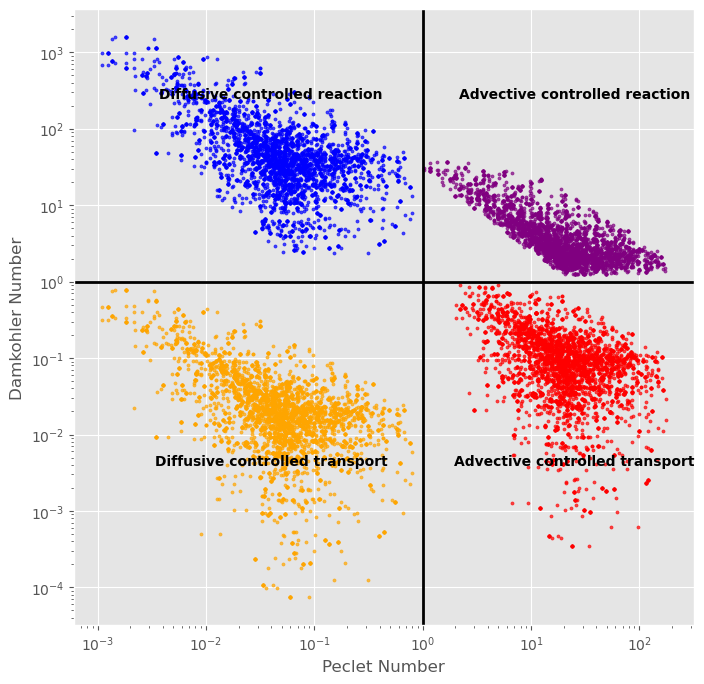

In [16]:
# plotting
plt.figure(figsize=(8,8))
plt.scatter(diff_reaction['Pe'], diff_reaction['Da'], c='blue', alpha=0.7, s = 5, label='Diffusive controlled reaction')
plt.scatter(adv_reaction['Pe'], adv_reaction['Da'], c='purple', alpha=0.7, s=5, label='Advective controlled reaction')
plt.scatter(diff_trans['Pe'], diff_trans['Da'], c='orange', alpha=0.7, s=5, label='Diffusive controlled transport')
plt.scatter(adv_trans['Pe'], adv_trans['Da'], c='red', alpha=0.7, s=5, label='Advective controlled transport')

# labeling
plt.annotate('Diffusive controlled reaction', (10**-1.4, 10**2.4), fontweight='bold', fontsize=10, ha='center')
plt.annotate('Advective controlled reaction', (10**1.4, 10**2.4), fontweight='bold', fontsize=10, ha='center')
plt.annotate('Diffusive controlled transport', (10**-1.4, 10**-2.4), fontweight='bold', fontsize=10, ha='center')
plt.annotate('Advective controlled transport', (10**1.4, 10**-2.4), fontweight='bold', fontsize=10, ha='center')

# formatting
plt.xlabel('Peclet Number')
plt.ylabel('Damkohler Number')
plt.xscale('log')
plt.yscale('log')
plt.axhline(1, c='black', linewidth=2)
plt.axvline(1, c='black', linewidth=2)
plt.show()

In [140]:
# take a random sample from each system and measure the time it takes to simulate a breakthrough curve
random.seed(0)
L = 2
times = np.linspace(0,12000,24000)

# begin simulations
choice = random.choice(np.arange(len(param_values))) # choose a random value from each of the systems
# diffusion controlled reaction
start = time.perf_counter()
params = diff_reaction.loc[choice].to_dict()
early, peak, late, concentrations, _ = model.concentration_102_all_metrics_adaptive(times, 
                                                                                        params['theta'], 
                                                                                        params['rho_b'],
                                                                                        params['D'],
                                                                                        params['v'],
                                                                                        params['lamb'],
                                                                                        params['alpha'],
                                                                                        params['kd'],
                                                                                        params['Co'],
                                                                                        L=L)
end = time.perf_counter()
elapsed = end-start
print(f'Time taken: {elapsed:.2f} seconds')

# advective controlled reaction
start = time.perf_counter()
params = adv_reaction.loc[choice].to_dict()
early, peak, late, concentrations, _ = model.concentration_102_all_metrics_adaptive(times, 
                                                                                        params['theta'], 
                                                                                        params['rho_b'],
                                                                                        params['D'],
                                                                                        params['v'],
                                                                                        params['lamb'],
                                                                                        params['alpha'],
                                                                                        params['kd'],
                                                                                        params['Co'],
                                                                                        L=L)
end = time.perf_counter()
elapsed = end-start
print(f'Time taken: {elapsed:.2f} seconds')

# diffusive controlled transport
start = time.perf_counter()
params = diff_trans.loc[choice].to_dict()
early, peak, late, concentrations, _ = model.concentration_102_all_metrics_adaptive(times, 
                                                                                        params['theta'], 
                                                                                        params['rho_b'],
                                                                                        params['D'],
                                                                                        params['v'],
                                                                                        params['lamb'],
                                                                                        params['alpha'],
                                                                                        params['kd'],
                                                                                        params['Co'],
                                                                                        L=L)
end = time.perf_counter()
elapsed = end-start
print(f'Time taken: {elapsed:.2f} seconds')

# advective controlled transport
start = time.perf_counter()
params = adv_trans.loc[choice].to_dict()
early, peak, late, concentrations, _ = model.concentration_102_all_metrics_adaptive(times, 
                                                                                        params['theta'], 
                                                                                        params['rho_b'],
                                                                                        params['D'],
                                                                                        params['v'],
                                                                                        params['lamb'],
                                                                                        params['alpha'],
                                                                                        params['kd'],
                                                                                        params['Co'],
                                                                                        L=L)
end = time.perf_counter()
elapsed = end-start
print(f'Time taken: {elapsed:.2f} seconds')

Time taken: 29.88 seconds
Time taken: 6.64 seconds
Time taken: 9.60 seconds
Time taken: 3.80 seconds


In [174]:
# take a small random sample (10?) of each system and plot the distributions of times
random.seed(0)
L = 2
#times = np.linspace(0,12000,24000)
times = np.linspace(0,12000,10000)

systems = {'diff_reaction':diff_reaction,
           'adv_reaction':adv_reaction,
           'diff_trans':diff_trans,
           'adv_trans':adv_trans}
results = {}

for key in systems:
    run_times = []
    for i in range(0,100):
        print(f'{key}, {i}')
        choice = random.choice(np.arange(len(param_values))) # choose a random value from each of the systems
        start = time.perf_counter()
        params = systems[key].loc[choice].to_dict()
        early, peak, late, concentrations, _ = model.concentration_102_all_metrics_adaptive(times, 
                                                                                            params['theta'], 
                                                                                            params['rho_b'],
                                                                                            params['D'],
                                                                                            params['v'],
                                                                                            params['lamb'],
                                                                                            params['alpha'],
                                                                                            params['kd'],
                                                                                            params['Co'],
                                                                                            L=L)
        end = time.perf_counter()
        elapsed = end-start
        run_times.append(elapsed)
    results[key] = run_times

diff_reaction, 0
diff_reaction, 1
diff_reaction, 2
diff_reaction, 3
diff_reaction, 4
diff_reaction, 5
diff_reaction, 6
diff_reaction, 7
diff_reaction, 8
diff_reaction, 9
diff_reaction, 10
diff_reaction, 11
diff_reaction, 12
diff_reaction, 13
diff_reaction, 14
diff_reaction, 15
diff_reaction, 16
diff_reaction, 17
diff_reaction, 18
diff_reaction, 19
diff_reaction, 20
diff_reaction, 21
diff_reaction, 22
diff_reaction, 23
diff_reaction, 24
diff_reaction, 25
diff_reaction, 26
diff_reaction, 27
diff_reaction, 28
diff_reaction, 29
diff_reaction, 30
diff_reaction, 31
diff_reaction, 32
diff_reaction, 33
diff_reaction, 34
diff_reaction, 35
diff_reaction, 36
diff_reaction, 37
diff_reaction, 38
diff_reaction, 39
diff_reaction, 40
diff_reaction, 41
diff_reaction, 42
diff_reaction, 43
diff_reaction, 44
diff_reaction, 45
diff_reaction, 46
diff_reaction, 47
diff_reaction, 48
diff_reaction, 49
diff_reaction, 50
diff_reaction, 51
diff_reaction, 52
diff_reaction, 53
diff_reaction, 54
diff_reaction, 55
di

/Users/williamtaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/williamtaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/williamtaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/williamtaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

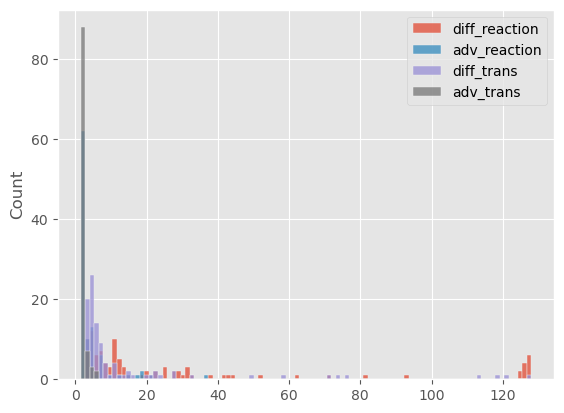

In [180]:
# Get the min and max values from all series in 'results' to define bin edges
all_values = np.concatenate([results[key] for key in results])
min_val = np.min(all_values)
max_val = np.max(all_values)

# Define the same bins using np.linspace or np.arange
bins = np.linspace(min_val, max_val, 100)  # Adjust the number of bins as needed

for key in results:
    sns.histplot(results[key], bins = bins, label=key)
plt.legend()
plt.show()

In [200]:
# how much of a difference are the longer times taking?
for key in results:
    mean = np.mean(results[key])
    print(f'Mean simulation time for {key}: {mean}')

    total = mean * 10000 / 60 / 60
    print(f'Total simulation time (hours) for {key}: {total}')

Mean simulation time for diff_reaction: 29.751046525839737
Total simulation time (hours) for diff_reaction: 82.6417959051104
Mean simulation time for adv_reaction: 4.109078211250017
Total simulation time (hours) for adv_reaction: 11.414106142361158
Mean simulation time for diff_trans: 15.025906716319987
Total simulation time (hours) for diff_trans: 41.73862976755552
Mean simulation time for adv_trans: 1.9301094816298792
Total simulation time (hours) for adv_trans: 5.361415226749664


A full simulation of diffusion-dominated reaction systems would take over three days, and diffusion-dominated transport systems would take almost two days. I need to cut this time in half, preferably more. But if I make the function have larger timesteps, will it capture the results well still? I can test this by comparing the calculated metrics for the same breakthrough curve simulated with the original function and a faster version.

In [338]:
print(v*2/D)

0.05


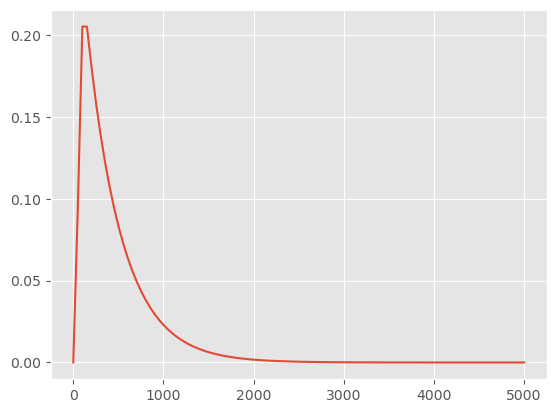

In [13]:
# generate an example case with a small Peclet number
times = np.linspace(1,5000,100)

theta = 1
rho_b = 1.5
D = 1
v = 0.1
lamb = 0
alpha = 1
kd = 0
Co = 1
L = 2
early, peak, late, concentrations = model.concentration_106_all_metrics(times,
                                                                                             theta,
                                                                                             rho_b,
                                                                                             D,
                                                                                             v,
                                                                                             lamb,
                                                                                             alpha,
                                                                                             kd,
                                                                                             Co,
                                                                                            L)
plt.plot(times,concentrations)
plt.show()

Why did I begin to treat dispersion independently from velocity? In my model, whenever dispersion is high I get weird BTCs. I wonder if this is because I'm creating an unrealistic system. The analytical solution for dispersion is:

$D_L = alpha * velocity + diffusion$

In [461]:
# Dl for the below system should be:
alpha = 0.83*np.log10(L)**2.414
diffusion = 1.0*10**-8
Dl = alpha*v+diffusion
print(f'Independently chosen dispersion value: {D}')
print(f'Calculated dispersion value: {Dl}')

Independently chosen dispersion value: 1
Calculated dispersion value: 0.006863315677041551


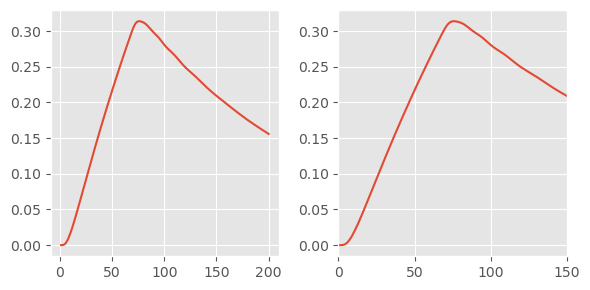

In [15]:
times = np.linspace(1,200,200)

theta = 1
rho_b = 1.5
D = 1
v = 0.15
lamb = 0
alpha = 1
kd = 0
Co = 1

early, peak, late, concentrations = model.concentration_106_all_metrics(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(times,concentrations)

plt.subplot(1,2,2)
plt.plot(times, concentrations)
plt.xlim(0,150)
plt.tight_layout()
plt.show()

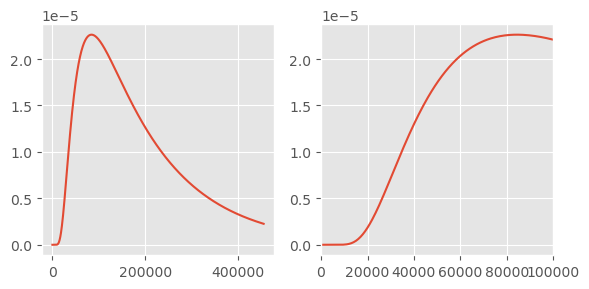

In [17]:
times = np.linspace(1,100000000000,1000)

theta = 1
rho_b = 1.5
v = 1.0*10**-5
diffusion = 1.0*10**-9
D = alpha*v+diffusion
lamb = 0
alpha = 1
kd = 0
Co = 1

early, peak, late, concentrations, adapt_times = model.concentration_106_all_metrics_adaptive(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(adapt_times,concentrations)

plt.subplot(1,2,2)
plt.plot(adapt_times, concentrations)
plt.xlim(0,100000)
plt.tight_layout()
plt.show()

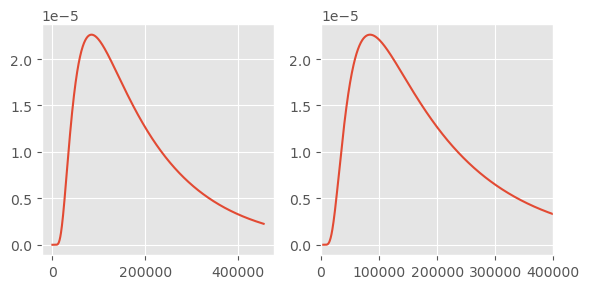

In [19]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(adapt_times,concentrations)

plt.subplot(1,2,2)
plt.plot(adapt_times, concentrations)
plt.xlim(0,400000)
plt.tight_layout()
plt.show()

In [21]:
print(f'approx days for late time tailing: {400000 /60/60/24}')
print(f'days for groundwater velocity to reach 2m: {2/(v *60*60*24)}')

approx days for late time tailing: 4.62962962962963
days for groundwater velocity to reach 2m: 2.3148148148148144


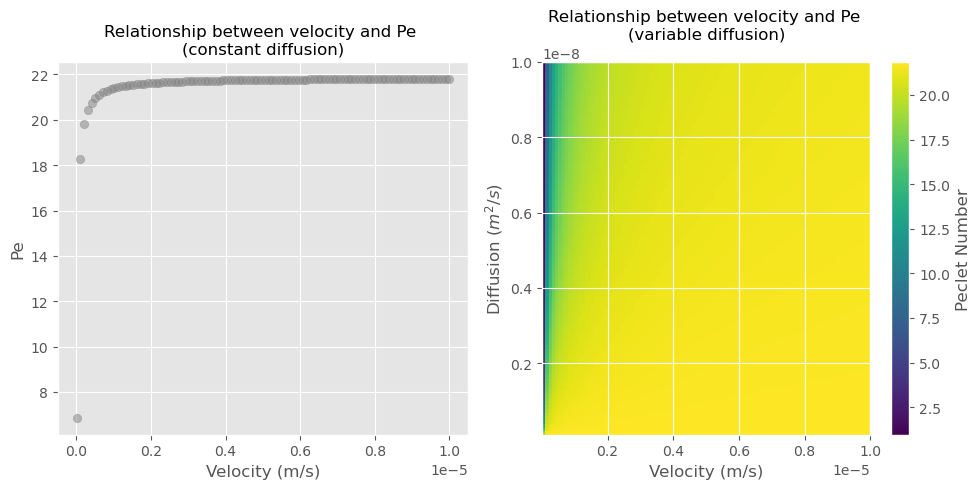

In [23]:
# Given constants and variables
L = 1  # Adjust L as needed (meters)
velocities = np.linspace(1.0*10**-8, 1.0*10**-5, 100)
diffusions = np.linspace(1.0 * 10 ** -10, 1.0 * 10 ** -8, 100)

# Create an array to store Peclet numbers for different velocity-diffusion pairs
Pecs = np.zeros((len(diffusions), len(velocities)))
alpha = 0.83*np.log10(2)**2.414
# Calculate the Peclet number for each combination
for i, d in enumerate(diffusions):
    for j, v in enumerate(velocities):
        dispersion = alpha * v + d
        Pecs[i, j] = v*L/dispersion

# Create the plot
plt.figure(figsize=(10, 5))

# Scatter plot for constant diffusion
diffusion = 1.0*10**-9
plt.subplot(1, 2, 1)
for v in velocities:
    dispersion = alpha * v + diffusion
    Pe = v*L/dispersion
    plt.scatter(v, Pe, c='gray', alpha=0.5)
plt.title('Relationship between velocity and Pe \n(constant diffusion)', fontsize=12)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Pe')

# Heatmap plot for variable diffusion
plt.subplot(1, 2, 2)
extent = [velocities.min(), velocities.max(), diffusions.min(), diffusions.max()]
plt.imshow(Pecs, cmap='viridis', interpolation='nearest', aspect='auto', extent=extent, origin='lower')
plt.colorbar(label='Peclet Number')

plt.title('Relationship between velocity and Pe \n(variable diffusion)', fontsize=12)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Diffusion ($m^2/s$)')
plt.tight_layout()
plt.show()

I think the primary issues were:
1. I was calculating Peclet based off of dispersion, not diffusion
2. My velocity values were way too fast (unless Goltz' equation is adjusted for the unit diff between velocity and dispersion, which I don't think is true)
It seems like my BTCs are going to take substantially longer to calculate now that the velocity is much slower. I could use velocity units of $meters/day$ instead of $meters/second$ though, which would help a lot. Will need to convert diffusion to daily units too.

In [39]:
# calculate the same breakthrough curve scenario:
# one with units of meters/sec
# the other with units of meters/day
# determine how much of a difference there is between the resulting indexes
import model

# meters/day
times = np.linspace(1,5000000,500)

theta = 0.5
rho_b = 1.5
v = 0.05
diffusion = 1.0*10**-9 * 86400
D = alpha*v+diffusion
lamb = 0
alpha = 1
kd = 0
Co = 1
L = 5000
early, peak, late, concentrations, adapt_times = model.concentration_106_all_metrics_adaptive(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L)

times_daily = np.linspace(1,5000000,500)
early_d, peak_d, late_d, concentrations_d, adapt_times_d = model.concentration_106_all_metrics_adaptive(times_daily, theta, rho_b, D, v, lamb, alpha, kd, Co, L)

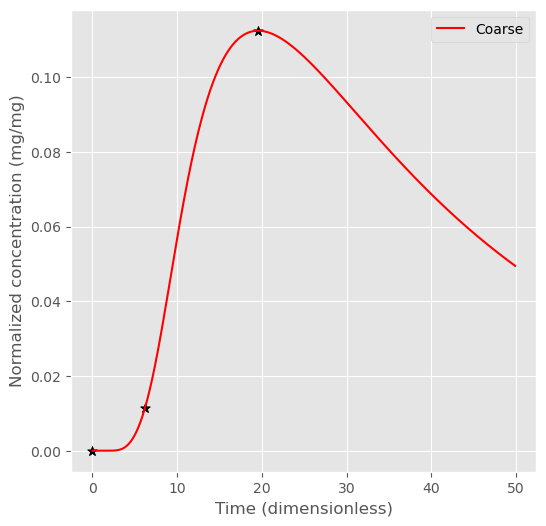

In [43]:
plt.figure(figsize=(6,6))
plt.plot(adapt_times, concentrations, label='Coarse', c='red')
plt.scatter(adapt_times[early], concentrations[early], marker='*', c='black', s=50)
plt.scatter(adapt_times[peak], concentrations[peak], marker='*', c='black', s=50)
plt.scatter(adapt_times[late], concentrations[late], marker='*', c='black', s=50)

plt.plot(adapt_times_d, concentrations_d, label='Fine', c='blue')
plt.scatter(adapt_times_d[early_d], concentrations_d[early_d], marker='*', c='black', s=50)
plt.scatter(adapt_times_d[peak_d], concentrations_d[peak_d], marker='*', c='black', s=50)
plt.scatter(adapt_times_d[late_d], concentrations_d[late_d], marker='*', c='black', s=50)

plt.ylabel('Normalized concentration (mg/mg)')
plt.xlabel('Time (dimensionless)')
plt.legend()
plt.show()

## Spatial simulation time requirements
Now I need to explore ranges of how long I need to make the time component for the spatial sensitivity analysis (L=5000). Start by plotting BTCs with a variety of different parameters.

In [10]:
# make a plotting function
def btc_plot(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L, title, color, ax=None):
    # run simulation
    early, peak, late, concentrations = model.concentration_106_all_metrics(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L)

    # make the axes editable later
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,6))
    else:
        fig = ax.figure
    
    ax.plot(times, concentrations, c=color)
    ax.scatter(times[early], concentrations[early], marker='*', c='black', zorder=2, s=100)
    ax.scatter(times[peak], concentrations[peak], marker='*', c='black', zorder=2, s=100)
    ax.scatter(times[late], concentrations[late], marker='*', c='black', zorder=2, s=100)
    ax.set_title(title, fontweight='bold', fontsize=14)
    
    return fig, ax

Peclet number:5000.0


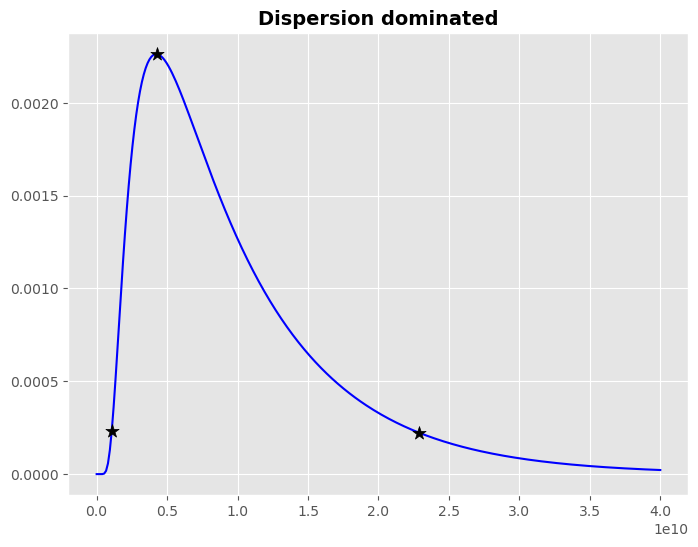

In [209]:
times = np.linspace(1,40000000000,300)

theta = 1
rho_b = 1.5
D = 0.001
v = 0.001
lamb = 0
alpha = 0
kd = 0
Co = 1
L = 5000
title = 'Dispersion dominated'
btc_plot(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L, title, color='blue')
print('Peclet number:' +str(v*L/D))

Peclet number:50000.0


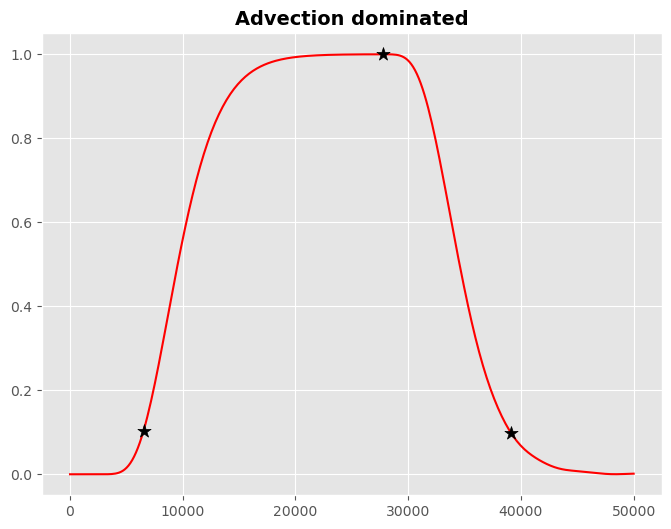

In [211]:
times = np.linspace(1,50000,300)

theta = 1
rho_b = 1.5
D = 0.1
v = 1
lamb = 0
alpha = 0
kd = 0
Co = 1
L = 5000
title = 'Advection dominated'
btc_plot(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L, title, color='red')
print('Peclet number:' +str(v*L/D))

I think if I use the same time discretization for all the simulations then the advection dominated scenarios will not be accurate, because the step size will be too coarse to capture the smaller differences. Test this theory below.

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Advection dominated'}>)

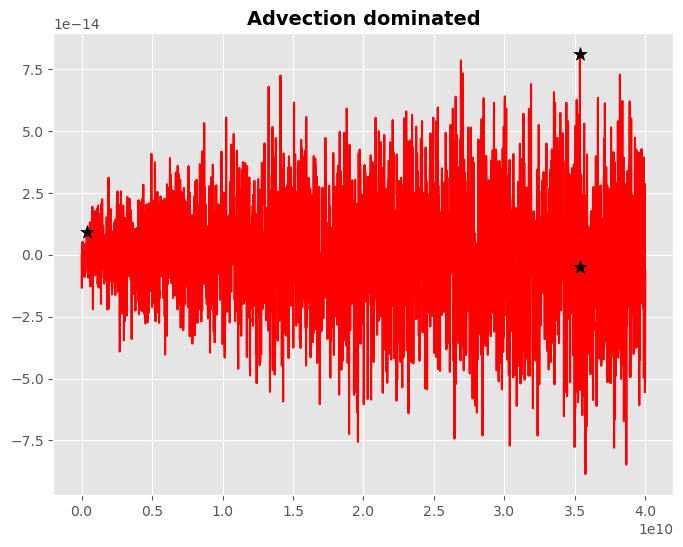

In [156]:
# same params as previous advection dominated simulation, but with the diffusion dominated time discretization
times = np.linspace(1,40000000000,3000)
theta = 1
rho_b = 1.5
D = 0.1
v = 1
lamb = 0
alpha = 0
kd = 0
Co = 1
L = 5000
title = 'Advection dominated'
fig, ax = plt.subplots(figsize=(8,6))
btc_plot(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L, title, color='red', ax=ax)
#ax.set_xlim(0,50000)

Yeah this is wrong. In hindsight this is a duh moment, the discretization step from the diffusion scenario is wider than the entire simulation time of the advection scenario. I think the solution to this is to make a function that determines the time discretization based on the peclet or dahmkohler number of the sampled system.

In [215]:
50000/0.001**2

50000000000.0

In [8]:
def time_discretization(v, num_steps):
    # this is approximately correct
    upper_bound = 50000/v**2
    times = np.linspace(1,upper_bound,num_steps)

    return times

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Advection dominated'}>)

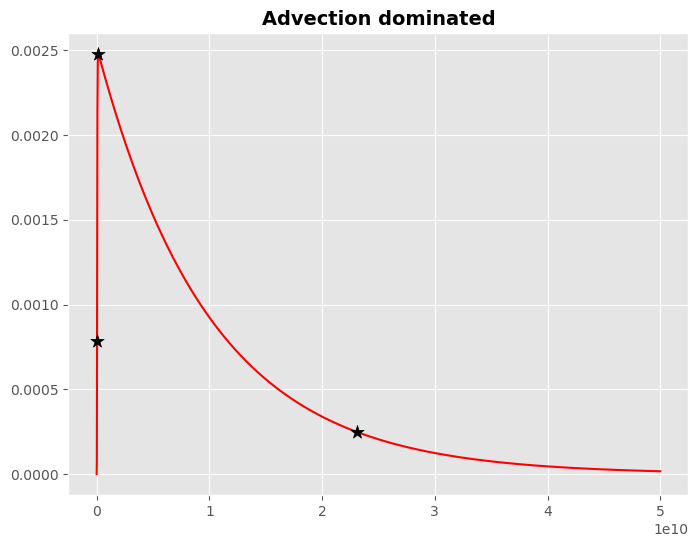

In [225]:
theta = 1
rho_b = 1.5
D = 0.1
v = 0.001
lamb = 0
alpha = 0
kd = 0
Co = 1
L = 5000
title = 'Advection dominated'
fig, ax = plt.subplots(figsize=(8,6))
times = time_discretization(v, 3000)
btc_plot(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L, title, color='red', ax=ax)

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Advection dominated'}>)

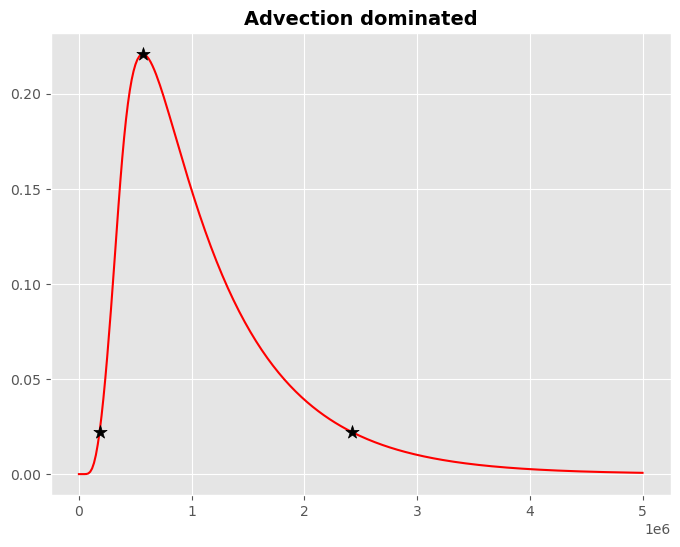

In [227]:
v = 0.1

title = 'Advection dominated'
fig, ax = plt.subplots(figsize=(8,6))
times = time_discretization(v, 300)
btc_plot(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L, title, color='red', ax=ax)

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Advection dominated'}>)

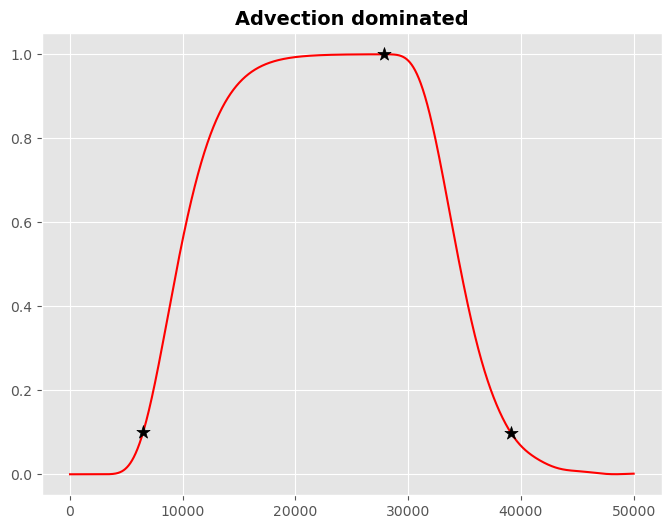

In [229]:
v = 1
lamb = 0
alpha = 0
kd = 0
Co = 1
L = 5000
title = 'Advection dominated'
fig, ax = plt.subplots(figsize=(8,6))
times = time_discretization(v, 3000)
btc_plot(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L, title, color='red', ax=ax)

## 12/18/24 Update:
I think my model is running incorrectly. I hard coded the x variable in the laplace function, which I think is causing the simulations to still run with a spatial assumption of 2 meters. This explains why in the above plots my BTCs are still arriving relatively early in the simulation time. Test by comparing the old function and an updated one here.

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Advection dominated'}>)

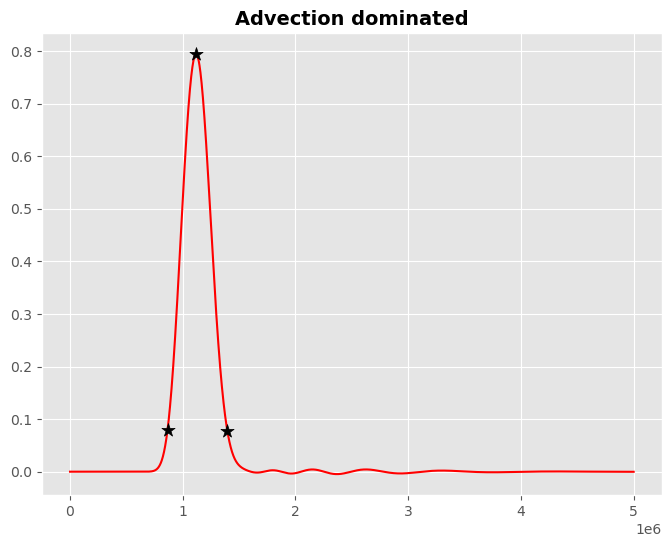

In [22]:
theta = 1
rho_b = 1.5
D = 0.001
v = .1
lamb = 0
alpha = 0
kd = 0
Co = 1
L = 5000
title = 'Advection dominated'
fig, ax = plt.subplots(figsize=(8,6))
times = time_discretization(v, 3000)
btc_plot(times, theta, rho_b, D, v, lamb, alpha, kd, Co, L, title, color='red', ax=ax)

In [64]:
def laplace_106(s, theta, rho_b, D, v, lamb, alpha, kd, Co, ts, x=L, L=L):
    '''Laplace time solution for a Type III boundary condition pulse injection in one dimension
    Returns a concentration value "C" in the laplace domain
    s: laplace frequency variable
    rho_b: bulk density
    D: dispersion
    v: pore velocity
    lamb: first order decay rate constant
    alpha: first order desorption rate constant
    kd: sorption distribution coefficient
    Co: initial concentration (injected, not already present in system)
    ts: pulse duration
    x: measured concentration location
    L: column length
    '''

    big_theta = s + lamb + (rho_b * alpha * kd * s) / (theta * (s + alpha))
    delta = 1/(2*D) * mp.sqrt((v**2 + 4*D*big_theta))
    d = 2 * delta * L
    h = D/v
    sigma = v/(2*D)
    
    r1 = sigma + delta
    r2 = sigma - delta
    
    term1_numerator = r2 * mp.exp(r1 * x - d) - r1 * mp.exp(r2 * x)
    term1_denominator = r2 * (1 - h * r1) * mp.exp(-d) - (1 - h * r2)*r1
    
    term1 = mp.fdiv(term1_numerator, term1_denominator)
    
    C = mp.fdiv(Co, s) * (1 - mp.exp(-ts * s)) * term1
    
    return C

def concentration_106_all_metrics(t, theta, rho_b, D, v, lamb, alpha, kd, Co, ts, L):
    '''Converts the laplace values from function laplace_106 to the real time domain
    Returns indexes for early arrival, peak concentration, and late time tailing, and an array of the concentration values
    Indexes are returned in dimensionless time
    '''
    concentration = []
    
    # convert to dimensionless time
    t = t/(L/v)

    for time in t:
        if time == 0:
            conc = 0  # Assuming concentration at t=0 is Co 
        else:
            conc = invertlaplace(lambda s: laplace_106(s, theta, rho_b, D, v, lamb, alpha, kd, Co, ts, x=L, L=L), time, method='dehoog')
        concentration.append(conc)
    # Convert to array and normalize
    C_array = np.array(concentration, dtype=float) / Co
    
    # Find peak concentration
    peak_C = np.max(C_array)
    peak_index = np.argmax(C_array)

    # Compute 10% of peak concentration
    tenth_percentile_value = 0.1 * peak_C
    
    # Find the index where the concentration first reaches 10% of peak value
    early_arrival_idx = 0
    for i in range(len(C_array)):
        if C_array[i] >= tenth_percentile_value:
            early_arrival_idx = i
            break

    # Find the index where the concentration first reaches 10% of peak value
    late_arrival_idx = 0
    for i in range(peak_index, len(C_array)):
        if C_array[i] <= tenth_percentile_value:
            late_arrival_idx = i
            break

    return early_arrival_idx, peak_index, late_arrival_idx, C_array

def concentration_106_all_metrics_adaptive(t, theta, rho_b, D, v, lamb, alpha, kd, Co, L):
    '''Converts the laplace solution from the function laplace_106 to the real time domain, with an adaptive time step to reduce computation time
    Returns indexes for early arrival, peak concentration, and late time tailing, and arrays of the concentration values and corresponding adaptive times
    Indexes are returned in dimensionless time
    '''
    # t is an input array of time values, the others are scalar parameters
    # initialize concentration and adaptive time lists
    concentration = []
    adaptive_times = []
    # convert to dimensionless time
    t = t/(L/v)
    default_step = t.max()/len(t)
    current_time = 0
    
    # tolerance limit of step size
    tolerance = 0.01
    
    while current_time < t.max():
        if current_time == 0:
            conc = 0  # deal with time 0 case, if there is already concentration in the system change to that value
        else:
            conc = invertlaplace(lambda s: laplace_106(s, theta, rho_b, D, v, lamb, alpha, kd, Co, ts=5, x=L, L=L), current_time, method='cohen')
        concentration.append(conc)
        adaptive_times.append(current_time)
        # check if concentration at current and previous time step changed substantially (> 1%)
        if len(concentration) < 2:
            current_time += default_step
        if len(concentration) > 1 and abs(concentration[-1] - concentration[-2]) > tolerance:
            current_time += default_step
        
        # speed up a lot if it's past the peak
        if len(concentration) > 1 and concentration[-1] / np.max(concentration) < 0.1:
            current_time += default_step * 100
        else:
            current_time += default_step * 1
            
    # Convert to array and normalize
    C_array = np.array(concentration, dtype=float) / Co
    
    # Find peak concentration
    peak_C = np.max(C_array)
    peak_index = np.argmax(C_array)

    # Compute 10% of peak concentration
    tenth_percentile_value = 0.1 * peak_C
    
    # Find the index where the concentration first reaches 10% of peak value
    early_arrival_idx = 0
    for i in range(len(C_array)):
        if C_array[i] >= tenth_percentile_value:
            early_arrival_idx = i
            break

    # Find the index where the concentration first reaches 10% of peak value
    late_arrival_idx = 0
    for i in range(peak_index, len(C_array)):
        if C_array[i] <= tenth_percentile_value:
            late_arrival_idx = i
            break

    return early_arrival_idx, peak_index, late_arrival_idx, C_array, adaptive_times

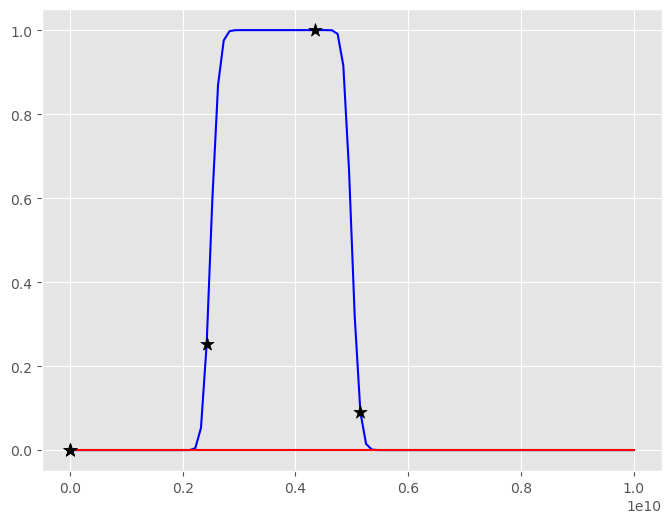

In [126]:
# run simulation
times = np.linspace(1,1*10**10,100)

fig, ax = plt.subplots(figsize=(8,6))

# low dispersion
theta = 0.5
rho_b = 1.5
D = 0.5
v = 0.1
lamb = 0
alpha = 0
kd = 0
Co = 1
L = 5000
ts = 50000
early, peak, late, concentrations = concentration_106_all_metrics(times, theta, rho_b, D, v, lamb, alpha, kd, Co, ts, L)
color='blue'
ax.plot(times, concentrations, c=color)
ax.scatter(times[early], concentrations[early], marker='*', c='black', zorder=2, s=100)
ax.scatter(times[peak], concentrations[peak], marker='*', c='black', zorder=2, s=100)
ax.scatter(times[late], concentrations[late], marker='*', c='black', zorder=2, s=100)

# high dispersion
theta = 0.5
rho_b = 1.5
D = 0.001
v = .1
lamb = 0.2
alpha = 0
kd = 0
Co = 1
L = 5000
ts = 50000
early, peak, late, concentrations = concentration_106_all_metrics(times, theta, rho_b, D, v, lamb, alpha, kd, Co, ts, L)
color='red'
ax.plot(times, concentrations, c=color)
ax.scatter(times[early], concentrations[early], marker='*', c='black', zorder=2, s=100)
ax.scatter(times[peak], concentrations[peak], marker='*', c='black', zorder=2, s=100)
ax.scatter(times[late], concentrations[late], marker='*', c='black', zorder=2, s=100)


## 12/26/24 Update
I realized that by performing the sobol analysis on the dimensionless time results, I am comparing across different time scales. I think this will be easier to just work in the real time domain and ensure my time is long enough for each of the different transport scenarios.

- Test the four different transport scenarios with a real time simulation.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import special
from scipy import interpolate
from numba import njit
from mpmath import invertlaplace
from mpmath import mp, exp
mp.dps = 12

In [89]:
def laplace_102(s, theta, rho_b, D, v, lamb, alpha, kd, Co, ts=5, x=2, L=2):
    '''Laplace time solution for a Type I boundary condition pulse injection in one dimension
    Returns a concentration value "C" in the laplace domain
    s: laplace frequency variable
    rho_b: bulk density
    D: dispersion
    v: pore velocity
    lamb: first order decay rate constant
    alpha: first order desorption rate constant
    kd: sorption distribution coefficient
    Co: initial concentration (injected, not already present in system)
    ts: pulse duration
    x: measured concentration location
    L: column length
    '''

    big_theta = s + lamb + (rho_b * alpha * kd * s) / (theta * (s + alpha))
    
    r1 = 1 / (2 * D) * (v + mp.sqrt(v ** 2 + 4 * D * big_theta))
    r2 = 1 / (2 * D) * (v - mp.sqrt(v ** 2 + 4 * D * big_theta))
    
    term1_numerator = r2 * mp.exp(r2 * L + r1 * x) - r1 * mp.exp(r1 * L + r2 * x)
    term1_denominator = r2 * mp.exp(r2 * L) - r1 * mp.exp(r1 * L)
    
    term1 = mp.fdiv(term1_numerator, term1_denominator)
    
    C = mp.fdiv(Co, s) * (1 - mp.exp(-ts * s)) * term1
    
    return C

def concentration_102_all_metrics(t, theta, rho_b, D, v, lamb, alpha, kd, Co, L):
    '''Converts the laplace values from function laplace_102 to the real time domain
    Returns indexes for early arrival, peak concentration, and late time tailing, and an array of the concentration values
    Indexes are returned in dimensionless time
    '''
    concentration = []

    for time in t:
        if time == 0:
            conc = 0  # Assuming concentration at t=0 is Co 
        else:
            conc = invertlaplace(lambda s: laplace_102(s, theta, rho_b, D, v, lamb, alpha, kd, Co, ts=5, x=2, L=2), time, method='dehoog')
        concentration.append(conc)
    # Convert to array and normalize
    C_array = np.array(concentration, dtype=float) / Co
    
    # Find peak concentration
    peak_C = np.max(C_array)
    peak_index = np.argmax(C_array)

    # Compute 10% of peak concentration
    tenth_percentile_value = 0.1 * peak_C
    
    # Find the index where the concentration first reaches 10% of peak value
    early_arrival_idx = 0
    for i in range(len(C_array)):
        if C_array[i] >= tenth_percentile_value:
            early_arrival_idx = i
            break

    # Find the index where the concentration first reaches 10% of peak value
    late_arrival_idx = 0
    for i in range(peak_index, len(C_array)):
        if C_array[i] <= tenth_percentile_value:
            late_arrival_idx = i
            break

    return early_arrival_idx, peak_index, late_arrival_idx, C_array

def concentration_102_all_metrics_adaptive(t, theta, rho_b, D, v, lamb, alpha, kd, Co, L):
    '''Converts the laplace solution from the function laplace_102 to the real time domain, with an adaptive time step to reduce computation time
    Returns indexes for early arrival, peak concentration, and late time tailing, and arrays of the concentration values and corresponding adaptive times
    Indexes are returned in dimensionless time
    '''
    # t is an input array of time values, the others are scalar parameters
    # initialize concentration and adaptive time lists
    concentration = []
    adaptive_times = []
   
    default_step = t.max()/len(t)
    current_time = 0
    
    # tolerance limit of step size
    tolerance = 0.01
    
    while current_time < t.max():
        if current_time == 0:
            conc = 0  # deal with time 0 case, if there is already concentration in the system change to that value
        else:
            conc = invertlaplace(lambda s: laplace_102(s, theta, rho_b, D, v, lamb, alpha, kd, Co, ts=5, x=2, L=2), current_time, method='dehoog')
        concentration.append(conc)
        adaptive_times.append(current_time)
        # check if concentration at current and previous time step changed substantially (> 1%)
        if len(concentration) < 2:
            current_time += default_step
        if len(concentration) > 1 and abs(concentration[-1] - concentration[-2]) > tolerance:
            current_time += default_step
        
        # speed up a lot if it's past the peak
        if len(concentration) > 1 and concentration[-1] / np.max(concentration) < 0.1:
            current_time += default_step * 100
        else:
            current_time += default_step * 1.5
            
    # Convert to array and normalize
    C_array = np.array(concentration, dtype=float) / Co
    
    # Find peak concentration
    peak_C = np.max(C_array)
    peak_index = np.argmax(C_array)

    # Compute 10% of peak concentration
    tenth_percentile_value = 0.1 * peak_C
    
    # Find the index where the concentration first reaches 10% of peak value
    early_arrival_idx = 0
    for i in range(len(C_array)):
        if C_array[i] >= tenth_percentile_value:
            early_arrival_idx = i
            break

    # Find the index where the concentration first reaches 10% of peak value
    late_arrival_idx = 0
    for i in range(peak_index, len(C_array)):
        if C_array[i] <= tenth_percentile_value:
            late_arrival_idx = i
            break

    return early_arrival_idx, peak_index, late_arrival_idx, C_array, adaptive_times

In [91]:
def laplace_106(s, theta, rho_b, D, v, lamb, alpha, kd, Co, ts=5, x=2, L=2):
    '''Laplace time solution for a Type III boundary condition pulse injection in one dimension
    Returns a concentration value "C" in the laplace domain
    s: laplace frequency variable
    rho_b: bulk density
    D: dispersion
    v: pore velocity
    lamb: first order decay rate constant
    alpha: first order desorption rate constant
    kd: sorption distribution coefficient
    Co: initial concentration (injected, not already present in system)
    ts: pulse duration
    x: measured concentration location
    L: column length
    '''

    big_theta = s + lamb + (rho_b * alpha * kd * s) / (theta * (s + alpha))
    delta = 1/(2*D) * mp.sqrt((v**2 + 4*D*big_theta))
    d = 2 * delta * L
    h = D/v
    sigma = v/(2*D)
    
    r1 = sigma + delta
    r2 = sigma - delta
    
    term1_numerator = r2 * mp.exp(r1 * x - d) - r1 * mp.exp(r2 * x)
    term1_denominator = r2 * (1 - h * r1) * mp.exp(-d) - (1 - h * r2)*r1
    
    term1 = mp.fdiv(term1_numerator, term1_denominator)
    
    C = mp.fdiv(Co, s) * (1 - mp.exp(-ts * s)) * term1
    
    return C

def concentration_106_all_metrics(t, theta, rho_b, D, v, lamb, alpha, kd, Co, L):
    '''Converts the laplace values from function laplace_106 to the real time domain
    Returns indexes for early arrival, peak concentration, and late time tailing, and an array of the concentration values
    Indexes are returned in dimensionless time
    '''
    concentration = []
    
    for time in t:
        if time == 0:
            conc = 0  # Assuming concentration at t=0 is Co 
        else:
            conc = invertlaplace(lambda s: laplace_106(s, theta, rho_b, D, v, lamb, alpha, kd, Co, ts=5, x=2, L=2), time, method='dehoog')
        concentration.append(conc)
    # Convert to array and normalize
    C_array = np.array(concentration, dtype=float) / Co
    
    # Find peak concentration
    peak_C = np.max(C_array)
    peak_index = np.argmax(C_array)

    # Compute 10% of peak concentration
    tenth_percentile_value = 0.1 * peak_C
    
    # Find the index where the concentration first reaches 10% of peak value
    early_arrival_idx = 0
    for i in range(len(C_array)):
        if C_array[i] >= tenth_percentile_value:
            early_arrival_idx = i
            break

    # Find the index where the concentration first reaches 10% of peak value
    late_arrival_idx = 0
    for i in range(peak_index, len(C_array)):
        if C_array[i] <= tenth_percentile_value:
            late_arrival_idx = i
            break

    return early_arrival_idx, peak_index, late_arrival_idx, C_array

def concentration_106_all_metrics_adaptive(t, theta, rho_b, D, v, lamb, alpha, kd, Co, L):
    '''Converts the laplace solution from the function laplace_106 to the real time domain, with an adaptive time step to reduce computation time
    Returns indexes for early arrival, peak concentration, and late time tailing, and arrays of the concentration values and corresponding adaptive times
    Indexes are returned in dimensionless time
    '''
    # t is an input array of time values, the others are scalar parameters
    # initialize concentration and adaptive time lists
    concentration = []
    adaptive_times = []
    default_step = t.max()/len(t)
    current_time = 0
    
    # tolerance limit of step size
    tolerance = 0.01
    
    while current_time < t.max():
        if current_time == 0:
            conc = 0  # deal with time 0 case, if there is already concentration in the system change to that value
        else:
            conc = invertlaplace(lambda s: laplace_106(s, theta, rho_b, D, v, lamb, alpha, kd, Co, ts=5, x=2, L=2), current_time, method='dehoog')
        concentration.append(conc)
        adaptive_times.append(current_time)
        # check if concentration at current and previous time step changed substantially (> 1%)
        if len(concentration) < 2:
            current_time += default_step
        if len(concentration) > 1 and abs(concentration[-1] - concentration[-2]) > tolerance:
            current_time += default_step
        
        # speed up a lot if it's past the peak
        if len(concentration) > 1 and concentration[-1] / np.max(concentration) < 0.1:
            current_time += default_step * 100
        else:
            current_time += default_step * 1
            
    # Convert to array and normalize
    C_array = np.array(concentration, dtype=float) / Co
    
    # Find peak concentration
    peak_C = np.max(C_array)
    peak_index = np.argmax(C_array)

    # Compute 10% of peak concentration
    tenth_percentile_value = 0.1 * peak_C
    
    # Find the index where the concentration first reaches 10% of peak value
    early_arrival_idx = 0
    for i in range(len(C_array)):
        if C_array[i] >= tenth_percentile_value:
            early_arrival_idx = i
            break

    # Find the index where the concentration first reaches 10% of peak value
    late_arrival_idx = 0
    for i in range(peak_index, len(C_array)):
        if C_array[i] <= tenth_percentile_value:
            late_arrival_idx = i
            break

    return early_arrival_idx, peak_index, late_arrival_idx, C_array, adaptive_times

In [143]:
# diffusive controlled transport
# parameters
theta = 0.25
rho_b = 1.5
D = 0.1
v = 0.5
lamb = 0
alpha = 0
kd = 0
times = np.linspace(0,75,50)
L = 2

# run sim
early, peak, late, concs = concentration_102_all_metrics(times, theta, rho_b, D, v, lamb, alpha, kd, Co=1, L=2)
early6, peak6, late6, concs6 = concentration_106_all_metrics(times, theta, rho_b, D, v, lamb, alpha, kd, Co=1, L=2)

In [144]:
v**2/D

2.5

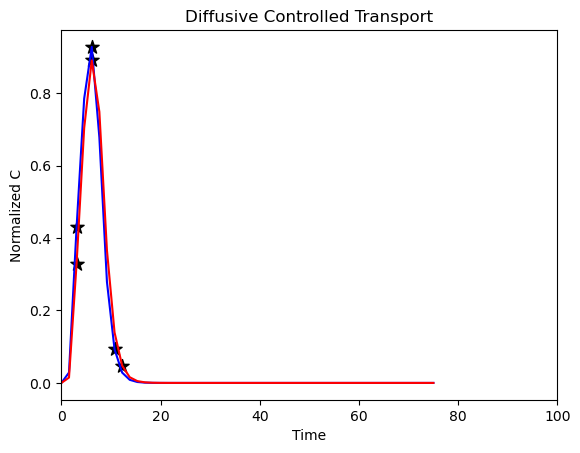

In [147]:
plt.plot(times, concs, c='blue')
plt.scatter(times[early], concs[early], marker='*', c='black', s=100)
plt.scatter(times[peak], concs[peak], marker='*', c='black', s=100)
plt.scatter(times[late], concs[late], marker='*', c='black', s=100)

plt.plot(times, concs6, c='red')
plt.scatter(times[early6], concs6[early6], marker='*', c='black', s=100)
plt.scatter(times[peak6], concs6[peak6], marker='*', c='black', s=100)
plt.scatter(times[late6], concs6[late6], marker='*', c='black', s=100)

plt.xlabel('Time')
plt.ylabel('Normalized C')
plt.title('Diffusive Controlled Transport')
plt.xlim(0,100)
plt.show()

In [157]:
# I believe the models are working correctly. I'm going to use 106 because it seems more stable.
# dispersive controlled transport
theta = 0.5
rho_b = 1.5
D = 0.1
v = 0.001
lamb = 0.0005
alpha = 0.0005
kd = 0.0005
times = np.linspace(0,3000,500)
L = 2

# run sim
early, peak, late, concs = concentration_106_all_metrics(times, theta, rho_b, D, v, lamb, alpha, kd, Co=1, L=2)
print('done')

done


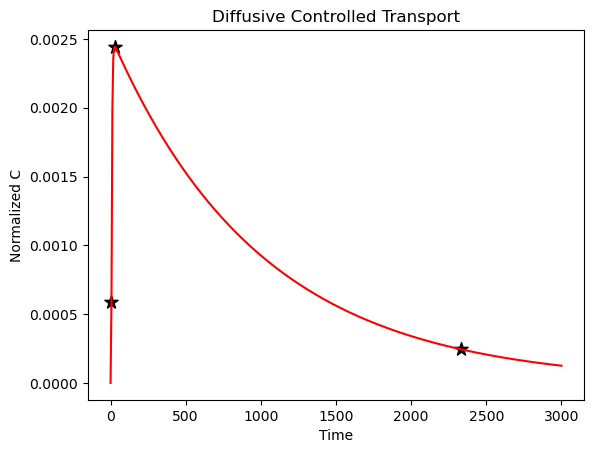

In [159]:
plt.plot(times, concs, c='red')
plt.scatter(times[early], concs[early], marker='*', c='black', s=100)
plt.scatter(times[peak], concs[peak], marker='*', c='black', s=100)
plt.scatter(times[late], concs[late], marker='*', c='black', s=100)

plt.xlabel('Time')
plt.ylabel('Normalized C')
plt.title('Diffusive Controlled Transport')
plt.show()